In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_theme(style="darkgrid")
sns.set_context("notebook", font_scale=1.5)

In [2]:
df = pd.read_csv('data/ny_listings.csv')
df.head()

/home/lacouth/anaconda3/envs/mn/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3155: DtypeWarning: Columns (67) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2595,https://www.airbnb.com/rooms/2595,20220603182654,2022-06-04,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,https://a0.muscache.com/pictures/f0813a11-40b2...,2845,https://www.airbnb.com/users/show/2845,...,4.79,4.86,4.41,NaN,f,3,3,0,0,0.31
1,5121,https://www.airbnb.com/rooms/5121,20220603182654,2022-06-04,BlissArtsSpace!,One room available for rent in a 2 bedroom apt...,NaN,https://a0.muscache.com/pictures/2090980c-b68e...,7356,https://www.airbnb.com/users/show/7356,...,4.91,4.47,4.52,NaN,f,2,0,2,0,0.32
2,5136,https://www.airbnb.com/rooms/5136,20220603182654,2022-06-04,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,7378,https://www.airbnb.com/users/show/7378,...,5.00,4.50,5.00,NaN,f,1,1,0,0,0.02
3,5178,https://www.airbnb.com/rooms/5178,20220603182654,2022-06-04,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",https://a0.muscache.com/pictures/12065/f070997...,8967,https://www.airbnb.com/users/show/8967,...,4.44,4.87,4.39,NaN,f,1,0,1,0,3.37
4,5203,https://www.airbnb.com/rooms/5203,20220603182654,2022-06-03,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,https://a0.muscache.com/pictures/103776/b37157...,7490,https://www.airbnb.com/users/show/7490,...,4.95,4.94,4.92,NaN,f,1,0,1,0,0.76


In [3]:
df.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'description',
       'neighborhood_overview', 'picture_url', 'host_id', 'host_url',
       'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_upd

## Cleaning the price column

In [4]:
df['price_cleansed'] = df['price'].str.replace('$','').replace(',','',regex=True).astype(float)
df['price_cleansed'].value_counts()

150.0     1114
100.0      996
200.0      827
50.0       742
60.0       741
          ... 
2800.0       1
2750.0       1
746.0        1
1690.0       1
9994.0       1
Name: price_cleansed, Length: 1059, dtype: int64

In [5]:
df['price_cleansed'].mean()

190.77522052927026

In [6]:
df['price_cleansed'].median()

125.0

## Filters (conditions)

In [7]:
def create_price_hist(df,title='',bins=10):
    plt.figure(figsize=(15,8))
    sns.histplot(df,stat='percent', bins=bins)
    plt.title(title)
    plt.xlabel('Price $')
    plt.ylabel('Percentage %')
    plt.show()
    

In [8]:
price_limit = 500
min_reviews = 12
bus_units = 2
local_units = 2

# Is more expensive to stay at an aibnb's superhost?

In [9]:
data_super_host = df[(df['host_is_superhost']=='t') & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']
data_not_super_host = df[(df['host_is_superhost'] == 'f') & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']

print(f'Mean price of super host listings: $ {data_super_host.mean():.2f}')
print(f'Median price of super host listings: $ {data_super_host.median():.2f}')
print(f'Total of super host listings: {len(data_super_host)}')
print('-----------------------------------------------------')
print(f'Mean price of regular host listings: $ {data_not_super_host.mean():.2f}')
print(f'Median price of regular host listings: $ {data_not_super_host.median():.2f}')
print(f'Total of regular host listings: {len(data_not_super_host)}')

Mean price of super host listings: $ 168.00
Median price of super host listings: $ 149.00
Total of super host listings: 3581
-----------------------------------------------------
Mean price of regular host listings: $ 156.33
Median price of regular host listings: $ 128.00
Total of regular host listings: 3231


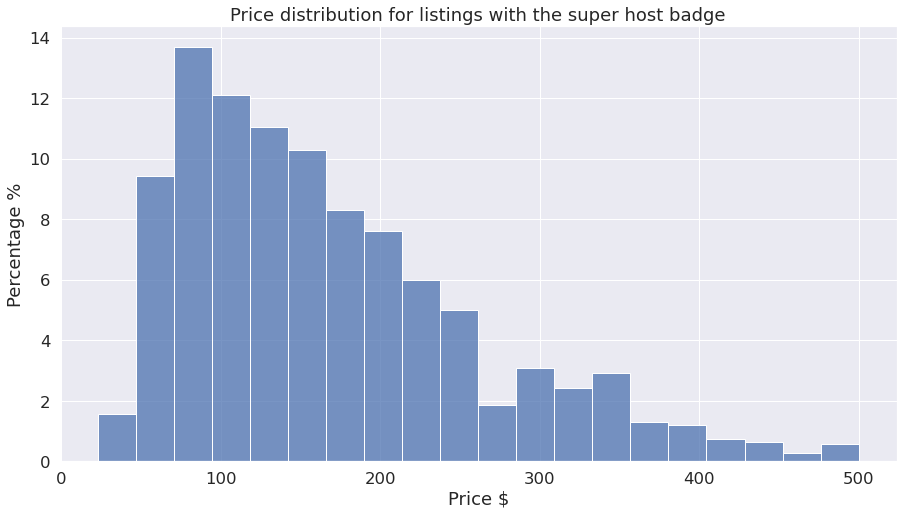

In [10]:
create_price_hist(data_super_host,f'Price distribution for listings with the super host badge',20)

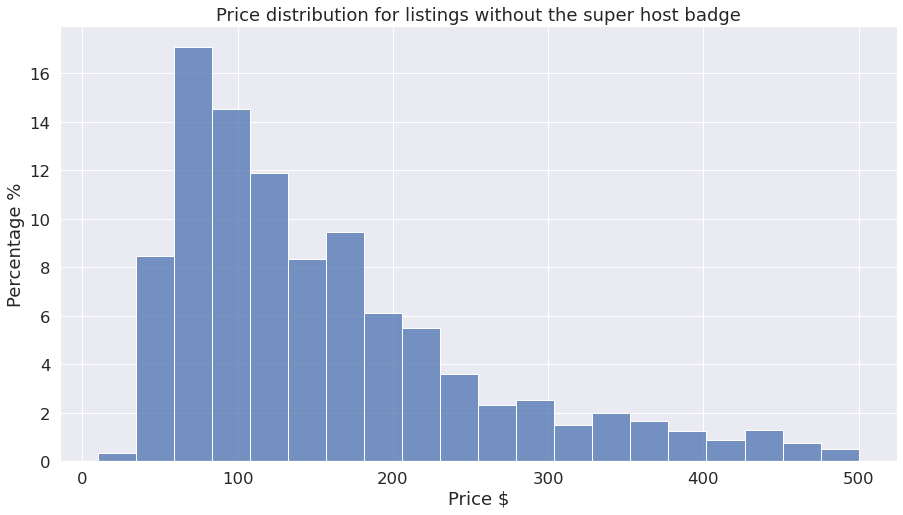

In [11]:
create_price_hist(data_not_super_host,f'Price distribution for listings without the super host badge',20)

# How "professional" hosts impact the airbnb prices? 

In [12]:
ml = df[(df['property_type']=='Entire rental unit')]['calculated_host_listings_count_entire_homes'].value_counts().sort_index()
ml_clean = pd.concat([ml.iloc[1:9], pd.Series(np.sum(ml.iloc[9:]))],ignore_index=True)

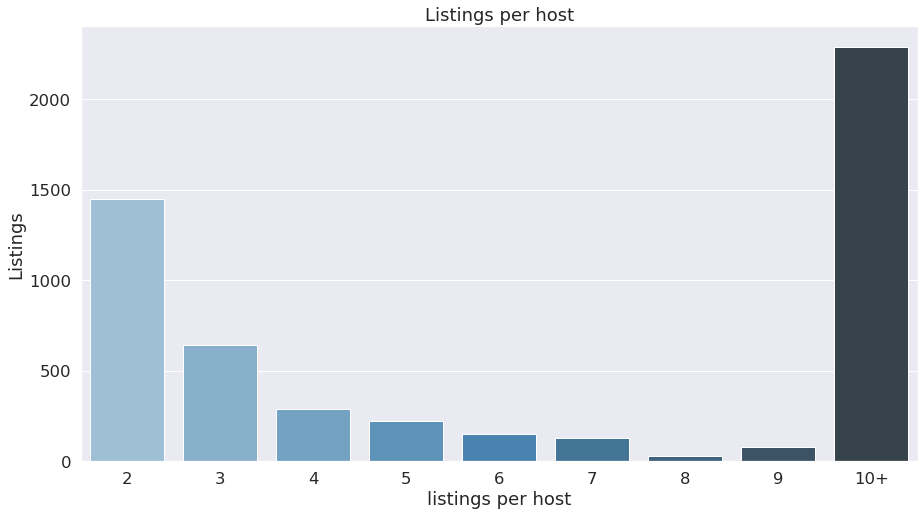

In [13]:
plt.figure(figsize=(15,8))
plt.title('Listings per host')
plt.xlabel('listings per host')
plt.ylabel('Listings')
sns.barplot(x=['2','3','4','5','6','7','8','9','10+'],y=ml_clean,palette="Blues_d")
plt.show()

In [14]:
data_bus = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] >= bus_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']
data_local = df[(df['property_type']=='Entire rental unit') & (df['calculated_host_listings_count_entire_homes'] <  local_units) & (df['number_of_reviews_ltm'] >= min_reviews) & (df['price_cleansed'] <= price_limit) & (df['price_cleansed'] > 0)]['price_cleansed']

print(f'Mean price for business: ${data_bus.mean():.2f}')
print(f'Median price for business:  ${data_bus.median():.2f}')
print(f'Total of business listings: {len(data_bus)}')
print('------------------------------------------------')
print(f'Mean price for local: ${data_local.mean():.2f}')
print(f'Median price for local: ${data_local.median():.2f}')
print(f'Total of local listings: {len(data_local)}')


Mean price for business: $206.84
Median price for business:  $193.00
Total of business listings: 1206
------------------------------------------------
Mean price for local: $196.02
Median price for local: $175.00
Total of local listings: 1720


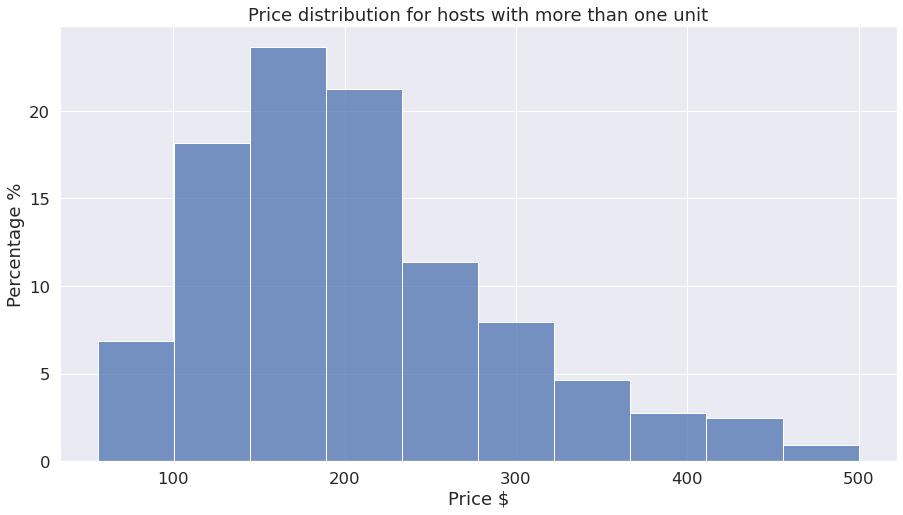

In [15]:
create_price_hist(data_bus,f'Price distribution for hosts with more than one unit')

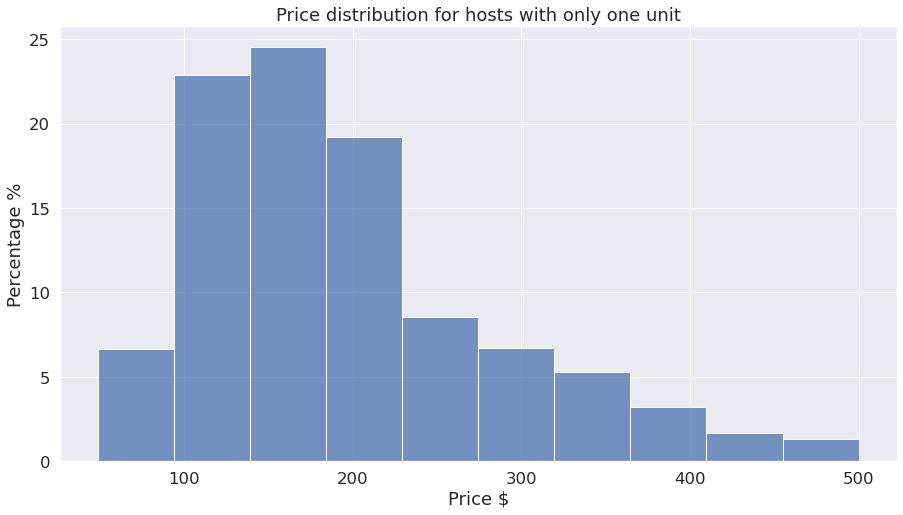

In [16]:
create_price_hist(data_local,'Price distribution for hosts with only one unit')